<a href="https://colab.research.google.com/github/BartBennett/SimStudent/blob/main/MMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
 def arrival():
    global servers_idle_time
    #Change system state
    number_in_the_system.append(number_in_the_system[-1]+1)
    #Create record for customer just arriving
    customers.append(customer(event_queue[0].customer_ID, sim_time[-1], 0, 0))
    #Schedule the arrival for the next customer
    event_queue.append(event(sim_time[-1] + np.random.exponential(3.0), "Arrival", event_queue[0].customer_ID+1))
    #Arrival and immediate service
    if number_in_the_system[-1] <= servers:
        #print("Time: ", sim_time[-1], " Arrival with immediate service: ", event_queue[0].customer_ID)
        #Add the service_time to the customer's record
        customers[-1].service_time = sim_time[-1]
        #Schedule this customer's departure
        event_queue.append(event(sim_time[-1] + np.random.exponential(2.0), "Departure", event_queue[0].customer_ID))
        #Calculate idle time for serevers for every customer except the first
        if len(customers) > 1:
            servers_idle_time += (sim_time[-1] - sim_time[-2]) * (servers - number_in_the_system[-2])
    #Arrival and wait in the queue
    else:
        #print("Time: ", sim_time[-1], " Arrival, waiting in queue: ", event_queue[0].customer_ID)
        #Add customer to queue
        queue.append(event_queue[0].customer_ID)
        #Increment the number in the queue
        number_in_the_queue.append(number_in_the_queue[-1]+1)
        #Add the sim_time for plotting the queue length
        queue_time.append(sim_time[-1])
        
def departure():
    global servers_idle_time
    #Change system state
    number_in_the_system.append(number_in_the_system[-1]-1)
    #Add the deparure time to the customer's record
    customers[event_queue[0].customer_ID].departure_time = sim_time[-1]
    #Departure with the next person in the queue served
    if number_in_the_system[-1] >= servers:
        #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " Serving: ", queue[0])
        #Add service time for customer who was in the queue
        customers[int(queue[0])].service_time = sim_time[-1]
        #Schedule the departure for this customer
        event_queue.append(event(sim_time[-1] + np.random.exponential(2.0), "Departure", queue[0]))
        #Remove this customer from the queue
        del queue[0]
        #Decrement the number in the queue
        number_in_the_queue.append(number_in_the_queue[-1]-1)
        #Add the sim_time for plotting the queue length
        queue_time.append(sim_time[-1])
    #Departure with the next person with no one in the queue
    else:
        #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " system empty")
        #Calculate idle time
        servers_idle_time += (sim_time[-1] - sim_time[-2]) * (servers - number_in_the_system[-2])

#system state
number_in_the_system = [0]

#entity attributes
class customer:
    def __init__(self, customer_ID, arrival_time, service_time, departure_time):
        self.customer_ID = int(customer_ID)
        self.arrival_time = arrival_time
        self.service_time = service_time
        self.departure_time = departure_time

customers = []

#resource
servers = 1

#events
class event:
    def __init__(self, sim_time, event_type, customer_ID):
        self.sim_time = sim_time
        self.event_type = event_type
        self.customer_ID = int(customer_ID)

event_queue = []
event_queue.append(event(np.random.exponential(3.0), "Arrival", 0))

#sets
queue = []
number_in_the_queue = [0]
queue_time = [0]

#Statistics 
servers_idle_time = event_queue[0].sim_time * servers

#timing
max_time = 1000000
sim_time = [0]

while event_queue[0].sim_time <= max_time:
    sim_time.append(event_queue[0].sim_time)
    if event_queue[0].event_type == 'Arrival':
        arrival()
    else:
        departure()
    #Delete event just processed
    del event_queue[0]
    #Sort the event queue
    event_queue.sort(key = lambda x : x.sim_time) 

#Calculate last_arrived, last_served, and last_departed
last_arrived = customers[-1].customer_ID
last_served = last_arrived
while customers[last_served].service_time == 0:
    last_served -= 1
last_departed = last_served   
while customers[last_departed].departure_time == 0:
    last_departed -= 1

sum_person_time = sum(customers[c].departure_time - customers[c].arrival_time for c in range(0,last_departed))
sum_person_queue_time = sum(customers[c].service_time - customers[c].arrival_time for c in range(0,last_served))
print("L = ",sum_person_time/customers[last_departed].departure_time)
print("Lq = ",sum_person_queue_time/customers[last_served].service_time)
print("W = ",sum_person_time/last_departed)
print("Wq = ",sum_person_queue_time/last_served)
print("rho = ", 1 - servers_idle_time/max_time/servers)

L =  2.009974711564599
Lq =  1.3444313746511813
W =  6.0342769611916065
Wq =  4.036204389066892
rho =  0.665544951255524


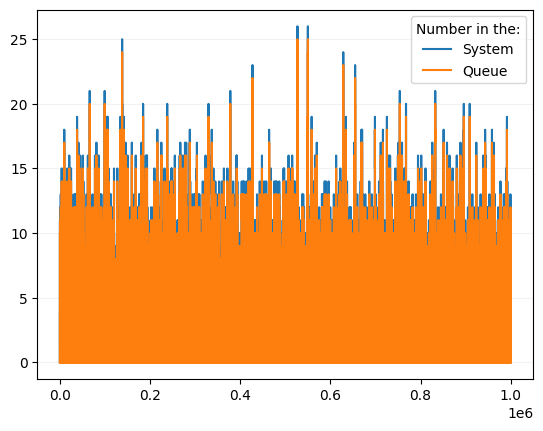

In [38]:
plt.step(sim_time, number_in_the_system, where='post', label='System')
plt.step(queue_time, number_in_the_queue, where='post', label='Queue')
plt.grid(axis='y', color='0.95')
plt.legend(title='Number in the:')
plt.show()

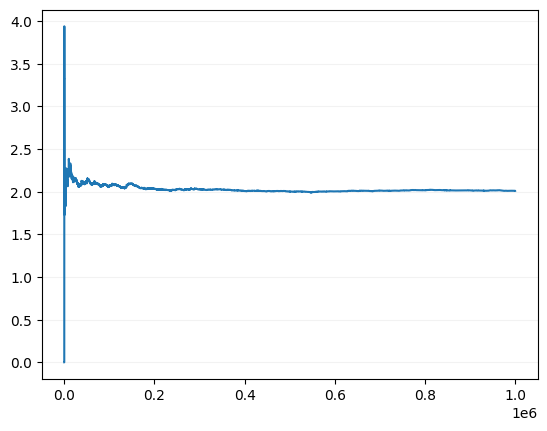

In [39]:
people_time = 0
L = [0]
for i in range(1, len(sim_time)):
    people_time += number_in_the_system[i-1] * (sim_time[i] - sim_time[i-1])
    L.append(people_time/sim_time[i])
plt.step(sim_time, L, where='post', label='Average Number in the System')
plt.grid(axis='y', color='0.95')
plt.show()